In [36]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")


In [37]:
df=pd.read_csv('../2 Extras/RegresionLinealMultiple/data_co2.csv')
df.shape

(36, 6)

In [38]:
df

,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN
5,VW,Up!,1000,929,105,NaN
6,Skoda,Fabia,1400,1109,90,NaN
7,Mercedes,A-Class,1500,1365,92,NaN
8,Ford,Fiesta,1500,1112,98,NaN
9,Audi,A1,1600,1150,99,NaN


In [39]:
df.drop(columns=['Unnamed: 5'], inplace=True)
df

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [40]:
X=df[['Weight','Volume']]
y=df['CO2']


In [41]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [42]:
import numpy as np
predictedCO2=regr.predict([[2300,1300],[3300,1300],[2800,1500]])
print(predictedCO2)

[107.2087328  114.75968007 112.54525794]


In [43]:
print(regr.coef_)

[0.00755095 0.00780526]


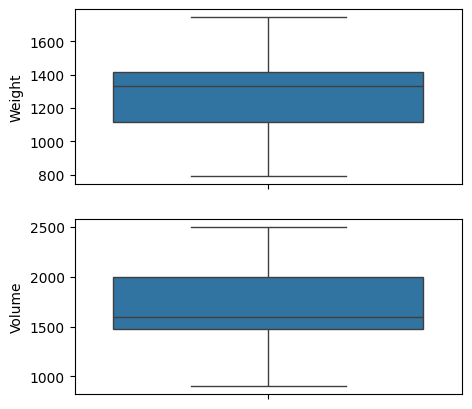

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(2,figsize=(5,5))
plt1=sns.boxplot(df['Weight'],ax=axs[0]) 
plt2=sns.boxplot(df['Volume'],ax=axs[1])


<Axes: xlabel='CO2', ylabel='Count'>

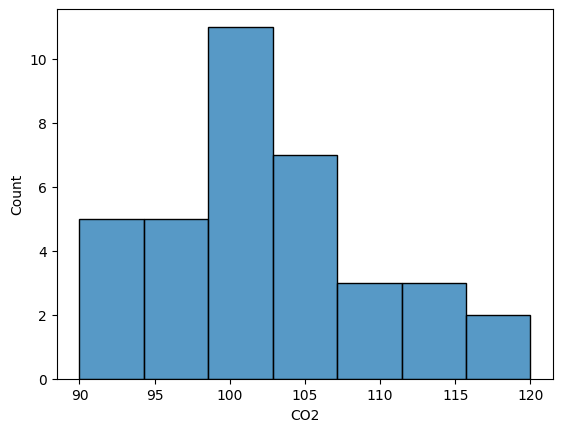

In [45]:
sns.histplot(df['CO2'])

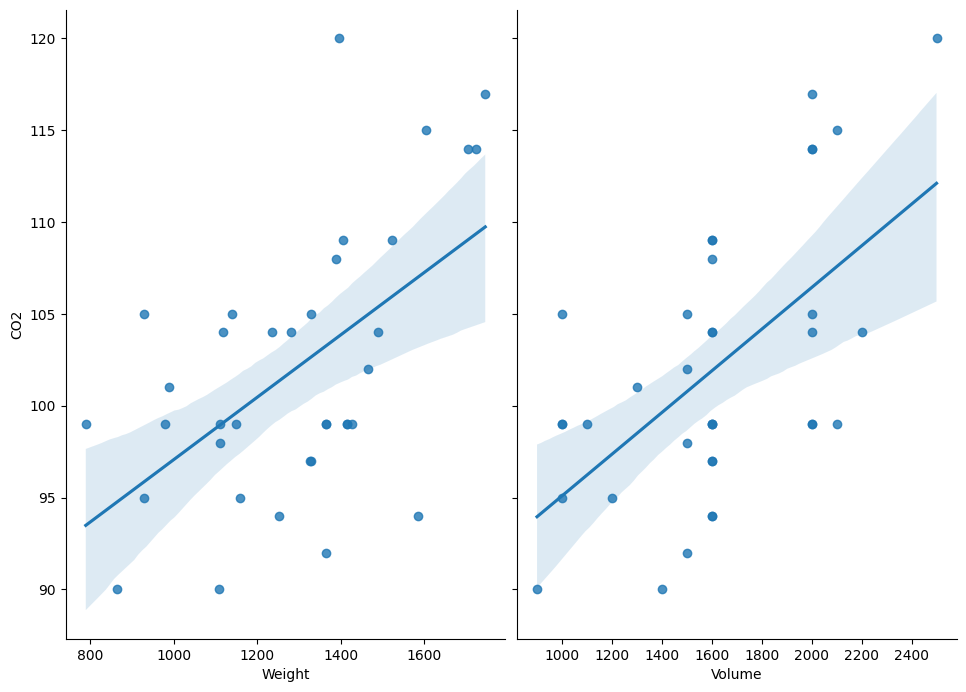

In [46]:
sns.pairplot(df, x_vars=['Weight','Volume'], y_vars='CO2', height=7, aspect=0.7, kind='reg')
plt.show()

<Axes: >

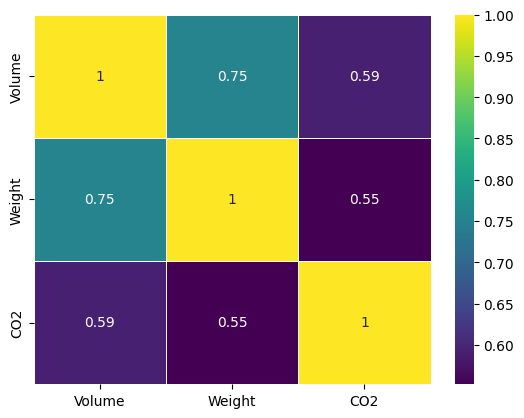

In [47]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis',linewidths=0.5)

In [54]:
print("intercept: ", regr.intercept_)
print("coef: ", regr.coef_)
print("R^2: ", regr.score(X,y))

intercept:  79.69471929115939
coef:  [0.00755095 0.00780526]
R^2:  0.3765564043619989


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=100)

In [49]:
y_train.shape

(25,)

In [50]:
y_test.shape

(11,)

In [52]:
reg_model=linear_model.LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression()

In [53]:
print("intercept: ", reg_model.intercept_)
print("coef: ", reg_model.coef_)
print("R^2: ", reg_model.score(X_train,y_train))
list(zip(X,reg_model.coef_))

intercept:  74.33882836589245
coef:  [0.01718006 0.00250464]
R^2:  0.44930085914974294


[('Weight', np.float64(0.0171800645996374)),
 ('Volume', np.float64(0.0025046399866402976))]